In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import xlrd 
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
filename="../input/ghana-covid19-dataset/Ghana_Covid19_DailyActive.csv"
data=pd.read_csv(filename)
data.head()

,confirmed,recovered,death,date,cumulative_confirmed,cumulative_recovered,cumulative_death,active_cases
0,2,0,0,03/12/2020,2,0,0,2
1,2,0,0,03/13/2020,4,0,0,4
2,2,0,0,03/14/2020,6,0,0,6
3,1,0,0,03/17/2020,7,0,0,7
4,2,0,0,03/18/2020,9,0,0,9


In [3]:
print(f'Date range: {len(data.date.unique())} days')
print('FROM', min(data.date), 'to', max(data.date))

Date range: 113 days
FROM 03/12/2020 to 07/24/2020


This is a 95 days data collection starting from FROM 03/12/2020 to 07/06/2020

In [4]:
data.shape

(113, 8)

The data consist of 95 Rows and 8 Columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   confirmed              113 non-null    int64 
 1   recovered              113 non-null    int64 
 2   death                  113 non-null    int64 
 3   date                   113 non-null    object
 4   cumulative_confirmed   113 non-null    int64 
 5   cumulative_recovered   113 non-null    int64 
 6   cumulative_death       113 non-null    int64 
 7   active_cases           113 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 7.2+ KB


Only the date columns is an object datatype,which later on i will change to datetime column.

In [6]:
data.isnull().sum()

confirmed                0
recovered                0
death                    0
date                     0
cumulative_confirmed     0
cumulative_recovered     0
cumulative_death         0
active_cases             0
dtype: int64

The data has no missing values.Which is good for exploratory analysis

In [7]:
data=data.rename(columns={'confirmed':'confirmedCases','recovered':'recoveredCases','death':'death','cumulative_confirmed ':'cumulativeConfirmed ','chol':'Chol',
                   'cumulative_recovered':'cumulativeRecovered','cumulative_death':'cumulativeDeath','active_cases':'activeCases'})

In [8]:
data.columns

Index(['confirmedCases', 'recoveredCases', 'death', 'date',
       'cumulativeConfirmed ', 'cumulativeRecovered', 'cumulativeDeath',
       'activeCases'],
      dtype='object')

I change the columns to suit my liking, nothing crucial about that

In [9]:
data.describe()

,confirmedCases,recoveredCases,death,cumulativeConfirmed,cumulativeRecovered,cumulativeDeath,activeCases
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,291.761062,261.008850,1.486726,10365.787611,6906.699115,56.601770,3402.486726
std,257.416189,589.890857,2.649512,9816.369642,8881.811541,53.436802,2326.287582
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000
25%,95.000000,0.000000,0.000000,834.000000,99.000000,9.000000,726.000000
50%,251.000000,72.000000,0.000000,7768.000000,2540.000000,35.000000,3863.000000
75%,427.000000,324.000000,2.000000,16431.000000,12257.000000,103.000000,4835.000000
max,1254.000000,5526.000000,15.000000,32969.000000,29494.000000,168.000000,8585.000000


IT is clearly seen that FOR THE PAST 95 DAYS, ON THE AVERAGE:

1. 246 CONFIRMED Cases,
2. 196 RECOVERY CASES, which is less,
3. 3347 ACTIVE CASES
Also on the average 1 person DIED in Ghana out of COVID for the past 95 days

In [10]:

print(f'The total number of CONFIRMED Cases for the past 95 days is :{(data.confirmedCases.sum())}')
print(f'The total number of Recovery Cases for the past 95 days is :{(data.recoveredCases.sum())}')
print(f'The total number of DEATH Cases for the past 95 days is :{(data.death.sum())}')
print(f'The total number of ACTIVE Cases for the past 95 days is :{(data.activeCases.sum())}')




The total number of CONFIRMED Cases for the past 95 days is :32969
The total number of Recovery Cases for the past 95 days is :29494
The total number of DEATH Cases for the past 95 days is :168
The total number of ACTIVE Cases for the past 95 days is :384481


In [11]:
confirmed=data.confirmedCases.sum()
recovery=data.recoveredCases.sum()
active=data.activeCases.sum()
death=data.death.sum()

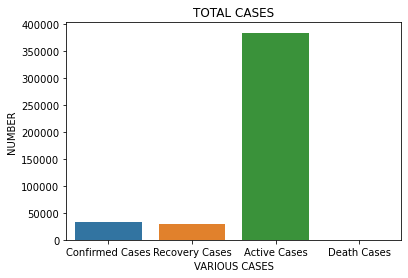

In [12]:
sns.barplot(x=["Confirmed Cases","Recovery Cases","Active Cases","Death Cases"],y=[confirmed,recovery,active,death])
plt.title("TOTAL CASES")
plt.xlabel("VARIOUS CASES")
plt.ylabel("NUMBER")
plt.show()

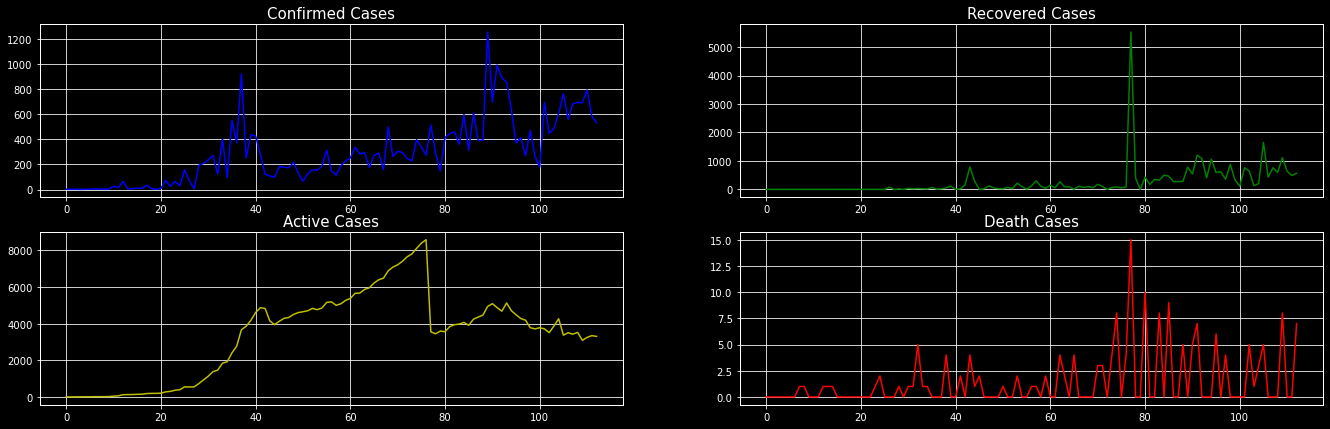

In [13]:
plt.style.use('ggplot')
plt.style.use('dark_background')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(23, 7))
ax1, ax2, ax3, ax4 = axes.ravel()

ax1.set_title('Confirmed Cases', fontsize=15)
ax1.plot(data.confirmedCases, color='b')

ax2.set_title('Recovered Cases', fontsize=15)
ax2.plot(data.recoveredCases, color='g')


ax3.set_title('Active Cases', fontsize=15)
ax3.plot(data.activeCases, color='y')

ax4.set_title('Death Cases', fontsize=15)
ax4.plot(data.death, color='r')



plt.show()

The above graph clearly shows that BOTH the CONFIRMED AND ACTIVE CASES keep rising each and every day.

On the other hand,both the RECOVERY AND DEATH CASES is on the low.

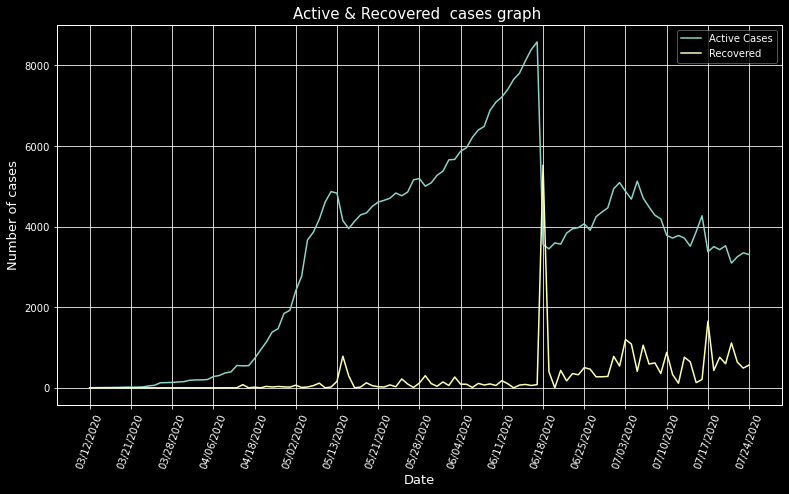

In [14]:

fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Active & Recovered  cases graph ', fontsize=15)
ax.set_xlabel('Date', size=13)
ax.set_ylabel('Number of cases', size=13)
plt.plot(data.activeCases,label='Active Cases')
plt.plot(data.date.unique(),data.recoveredCases,label='Recovered')
ax.set_xticks(ax.get_xticks()[::7])
plt.xticks(rotation=70)
ax.legend()
plt.show()

ON the 18/06/2020:

There was huge fall in ACTIVE CASES
WHILES a huge rise in RECOVERY CASES

TOTAL NUMBER OF ACTIVE CASE FROM GHANA HEALTH SERVICE WEBSITES WAS **3,558**
TOTAL NUMBER OF RECOVERY IS **10,074**

Based on revised national guidelins on recovery and descharge

[https://ghanahealthservice.org/covid19/archive.php]

In [15]:
new_data=pd.read_csv(filename, parse_dates=['date'],index_col='date')
new_data.head(5)

,confirmed,recovered,death,cumulative_confirmed,cumulative_recovered,cumulative_death,active_cases
date,,,,,,,
2020-03-12,2,0,0,2,0,0,2
2020-03-13,2,0,0,4,0,0,4
2020-03-14,2,0,0,6,0,0,6
2020-03-17,1,0,0,7,0,0,7
2020-03-18,2,0,0,9,0,0,9


In [16]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113 entries, 2020-03-12 to 2020-07-24
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   confirmed              113 non-null    int64
 1   recovered              113 non-null    int64
 2   death                  113 non-null    int64
 3   cumulative_confirmed   113 non-null    int64
 4   cumulative_recovered   113 non-null    int64
 5   cumulative_death       113 non-null    int64
 6   active_cases           113 non-null    int64
dtypes: int64(7)
memory usage: 7.1 KB


i created a new dataframe just to set the DATE column as datetime data type and also set as index

In [17]:
new_data.index

DatetimeIndex(['2020-03-12', '2020-03-13', '2020-03-14', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
               '2020-03-22', '2020-03-23',
               ...
               '2020-07-15', '2020-07-16', '2020-07-17', '2020-07-18',
               '2020-07-19', '2020-07-20', '2020-07-21', '2020-07-22',
               '2020-07-23', '2020-07-24'],
              dtype='datetime64[ns]', name='date', length=113, freq=None)

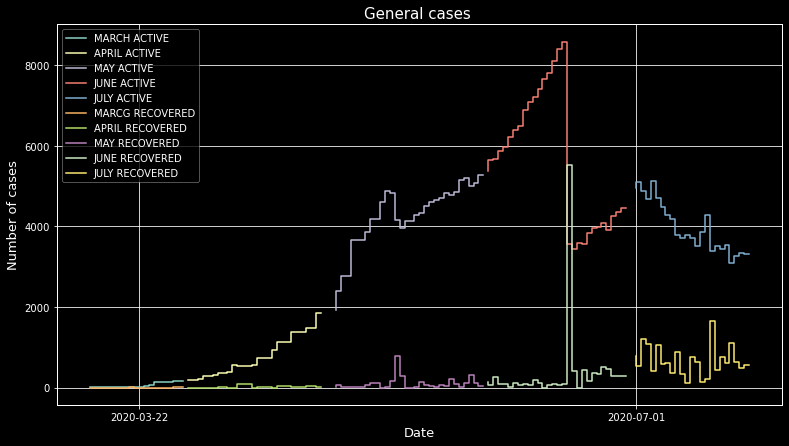

In [18]:
march_only=new_data["3/2020"]
april_only=new_data["4/2020"]
may_only=new_data["5/2020"]
june_only=new_data["6/2020"]
july_only=new_data["7/2020"]



fig, ax = plt.subplots(figsize=(13, 7))
plt.title('General cases ', fontsize=15)
plt.style.use('dark_background')
ax.set_xlabel('Date', size=13)
ax.set_ylabel('Number of cases', size=13)
plt.step(march_only.index,march_only['active_cases'], label='MARCH ACTIVE')
plt.step(april_only.index,april_only['active_cases'],label='APRIL ACTIVE')
plt.step(may_only.index,may_only['active_cases'],label='MAY ACTIVE')
plt.step(june_only.index,june_only['active_cases'],label='JUNE ACTIVE')
plt.step(july_only.index,july_only['active_cases'],label='JULY ACTIVE')

plt.step(march_only.index,march_only['recovered'],label='MARCG RECOVERED')
plt.step(april_only.index,april_only['recovered'],label='APRIL RECOVERED')
plt.step(may_only.index,may_only['recovered'],label='MAY RECOVERED')
plt.step(june_only.index,june_only['recovered'],label='JUNE RECOVERED')
plt.step(july_only.index,july_only['recovered'],label='JULY RECOVERED')


ax.set_xticks(ax.get_xticks()[::7])
ax.legend()
plt.show()

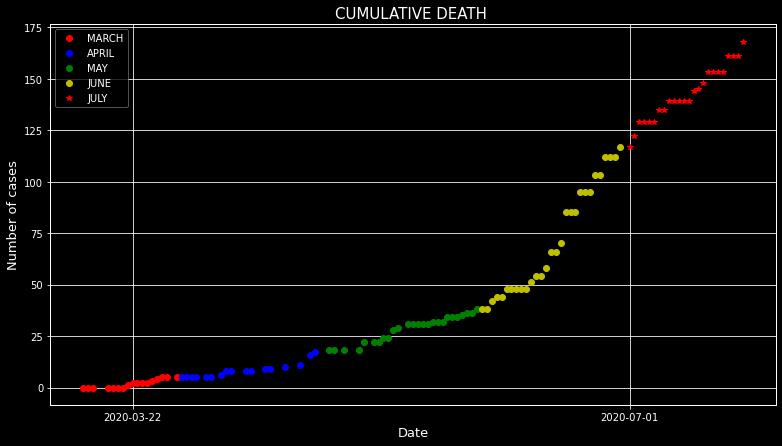

In [19]:
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('CUMULATIVE DEATH ', fontsize=15)
ax.set_xlabel('Date', size=13)
ax.set_ylabel('Number of cases', size=13)

plt.plot(march_only.index,march_only['cumulative_death'],'ro',label='MARCH')
plt.plot(april_only.index,april_only['cumulative_death'],'bo',label='APRIL')
plt.plot(may_only.index,may_only['cumulative_death'],'go',label='MAY')
plt.plot(june_only.index,june_only['cumulative_death'],'yo',label='JUNE')
plt.plot(july_only.index,july_only['cumulative_death'],'r*',label='JULY')

ax.set_xticks(ax.get_xticks()[::7])
ax.legend()
plt.show()

IT is clearly seen that the mortality rate in GHANA is on a higher increase

In [20]:
march_only.head()

,confirmed,recovered,death,cumulative_confirmed,cumulative_recovered,cumulative_death,active_cases
date,,,,,,,
2020-03-12,2,0,0,2,0,0,2
2020-03-13,2,0,0,4,0,0,4
2020-03-14,2,0,0,6,0,0,6
2020-03-17,1,0,0,7,0,0,7
2020-03-18,2,0,0,9,0,0,9


In [21]:
print(f'The total number of Death Cases in MARCH is :{(march_only.death.sum())}')
print(f'The total number of Death Cases in APRIL is :{(april_only.death.sum())}')
print(f'The total number of Death Cases in MAY is :{(may_only.death.sum())}')
print(f'The total number of Death Cases in JUNE is :{(june_only.death.sum())}')

The total number of Death Cases in MARCH is :5
The total number of Death Cases in APRIL is :12
The total number of Death Cases in MAY is :21
The total number of Death Cases in JUNE is :79


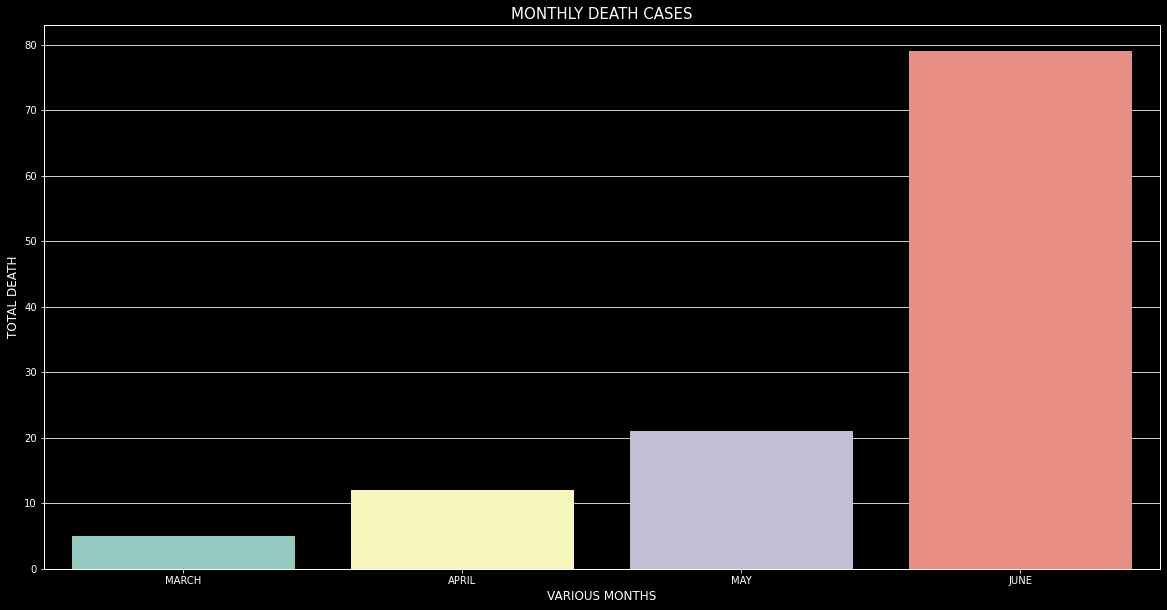

In [22]:
plt.figure(figsize=(20,10))
plt.title('MONTHLY DEATH CASES', fontsize=15)
sns.barplot(x=["MARCH","APRIL","MAY","JUNE"],y=[march_only.death.sum(),april_only.death.sum(),may_only.death.sum(),june_only.death.sum()])
plt.xlabel("VARIOUS MONTHS")
plt.ylabel("TOTAL DEATH")
plt.show()

THE BAR GRAPH ABOVE CLEARLY SHOWS AN INCREASING IN MORTALITIY RATE PER MONTHS

**EFFECTS OF LOCKDOWN ON THE IMPACTS OF COVID 19 IN GHANA**


THE GOVERNMENT OF GHANA ISSUED A LOCKDOWN FROM 30TH MARCH TO 20 APRIL. LETS NOW DISCUS ITS EFFECTS ON COVID 19 CASES IN GHANA.

In [23]:
Lockdown_period=new_data["30/3/2020":"20/4/2020"]
Lockdown_period.head()


,confirmed,recovered,death,cumulative_confirmed,cumulative_recovered,cumulative_death,active_cases
date,,,,,,,
2020-03-31,9,1,0,161,3,5,153
2020-04-01,34,0,0,195,3,5,187
2020-04-02,9,0,0,204,3,5,196
2020-04-03,1,0,0,205,3,5,197
2020-04-04,9,0,0,214,3,5,206


In [24]:
Lconfrimed_cases=Lockdown_period["confirmed"].sum()
Lactive_cases=Lockdown_period["active_cases"].sum()
Lrecovery_cases=Lockdown_period["recovered"].sum()
Ldeath_cases=Lockdown_period["death"].sum()

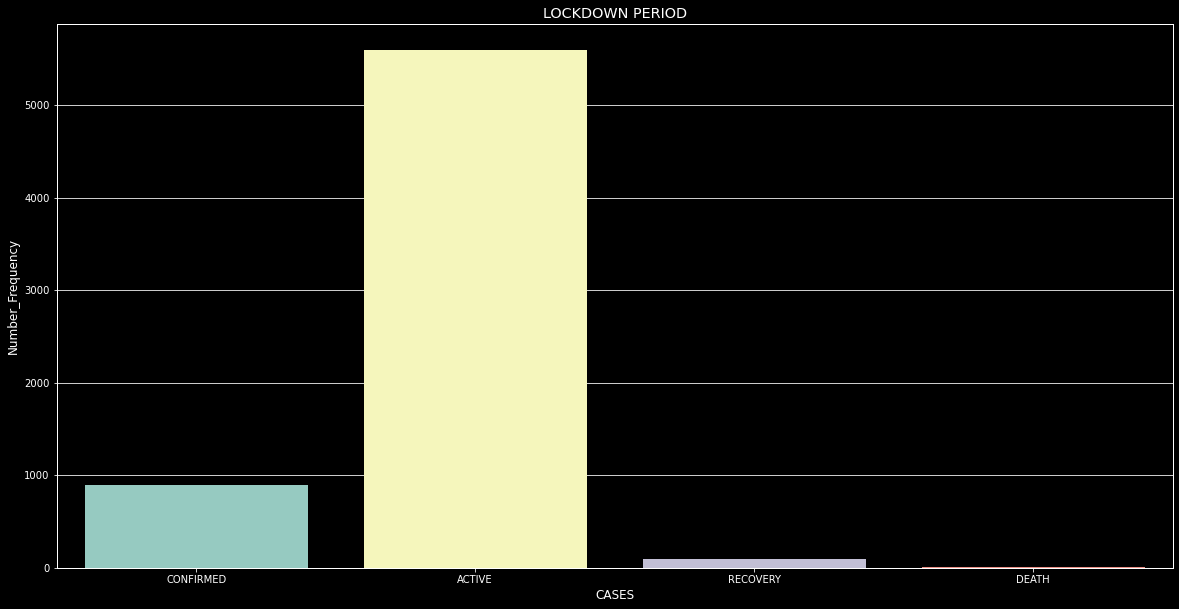

In [25]:
plt.figure(figsize=(20,10))
plt.title("LOCKDOWN PERIOD")
plt.xlabel("CASES")
plt.ylabel("Number_Frequency")
sns.barplot(x=["CONFIRMED","ACTIVE","RECOVERY","DEATH"],y=[Lconfrimed_cases,Lactive_cases,Lrecovery_cases,Ldeath_cases])
plt.show()

In [26]:
print(f'The total number of CONFIRMED Cases during LOCKDOWN is :{(Lconfrimed_cases)}')
print(f'The total number of ACTIVE Cases during LOCKDOWN is :{(Lactive_cases)}')
print(f'The total number of RECOVERY Cases during LOCKDOWN is :{(Lrecovery_cases)}')
print(f'The total number of DEATH Cases during LOCKDOWN is :{(Ldeath_cases)}')

The total number of CONFIRMED Cases during LOCKDOWN is :890
The total number of ACTIVE Cases during LOCKDOWN is :5596
The total number of RECOVERY Cases during LOCKDOWN is :97
The total number of DEATH Cases during LOCKDOWN is :4


THE HIGHER NUMBER FOR ACTIVE CASES WAS A RESULT OF THE CLOSURE OF THE BORDERS AND THE COMPULSORY QUARANTINE AND TESTING OF CITIZENS COMING FROM ABROAD.

ALSO,During the lockdown period the was high rise in ACTIVE CASES because a huge backlock of test samples conducted within this period.

In [27]:
After_Lockdown=new_data["20/4/2020":]
After_Lockdown.head()


,confirmed,recovered,death,cumulative_confirmed,cumulative_recovered,cumulative_death,active_cases
date,,,,,,,
2020-04-22,237,35,1,1279,134,10,1135
2020-04-25,271,21,1,1550,155,11,1384
2020-04-27,121,33,5,1671,188,16,1467
2020-04-28,403,24,1,2074,212,17,1845
2020-05-01,95,17,1,2169,229,18,1922


In [28]:
Aconfrimed_cases=After_Lockdown["confirmed"].sum()
Aactive_cases=After_Lockdown["active_cases"].sum()
Arecovery_cases=After_Lockdown["recovered"].sum()
Adeath_cases=After_Lockdown["death"].sum()

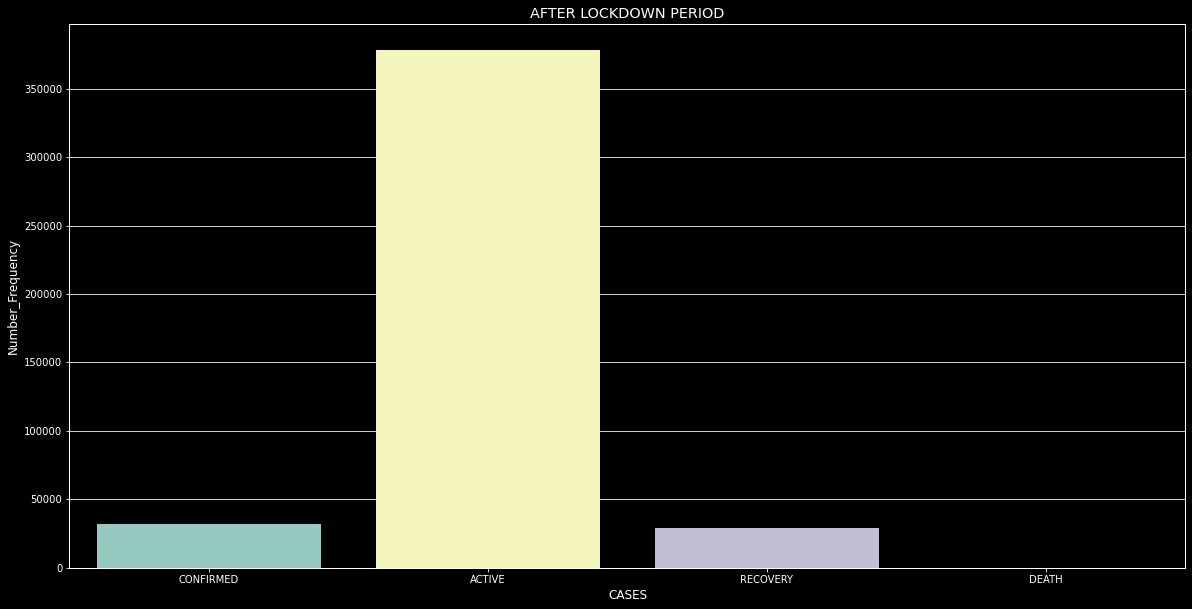

In [29]:
plt.figure(figsize=(20,10))
plt.title("AFTER LOCKDOWN PERIOD")
plt.xlabel("CASES")
plt.ylabel("Number_Frequency")
sns.barplot(x=["CONFIRMED","ACTIVE","RECOVERY","DEATH"],y=[Aconfrimed_cases,Aactive_cases,Arecovery_cases,Adeath_cases])
plt.show()

In [30]:
print(f'The total number of CONFIRMED Cases AFTER LOCKDOWN is :{(Aconfrimed_cases)}')
print(f'The total number of ACTIVE Cases AFTER LOCKDOWN is :{(Aactive_cases)}')
print(f'The total number of RECOVERY Cases AFTER LOCKDOWN is :{(Arecovery_cases)}')
print(f'The total number of DEATH Cases AFTER LOCKDOWN is :{(Adeath_cases)}')

The total number of CONFIRMED Cases AFTER LOCKDOWN is :31927
The total number of ACTIVE Cases AFTER LOCKDOWN is :378133
The total number of RECOVERY Cases AFTER LOCKDOWN is :29395
The total number of DEATH Cases AFTER LOCKDOWN is :159


AFTER LOCKDOWN THERE WAS A HUGE INCREASE IN RECOVERY CASES,WHICH SHOWS A SIGNIFICANT EFFECTS OF THE LOCKDOWN.

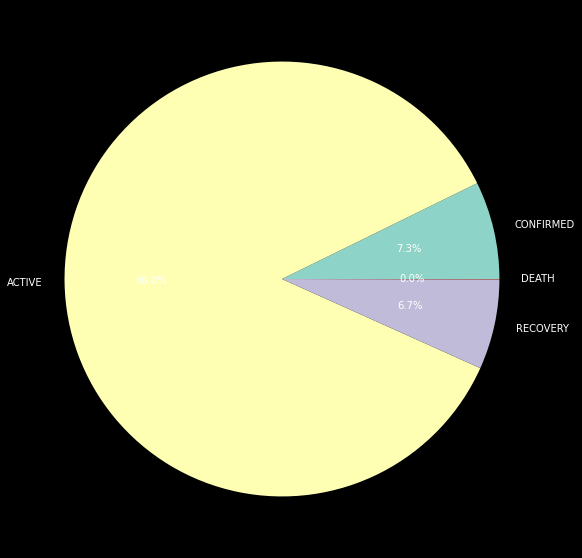

In [31]:
plt.figure(figsize=(10,10))
plt.pie([Aconfrimed_cases,Aactive_cases,Arecovery_cases,Adeath_cases],labels=["CONFIRMED","ACTIVE","RECOVERY","DEATH"],
        autopct='%1.1f%%')
plt.show()

In [32]:
filename="../input/ghana-covid19-data/regional cases.xlsx"
region=pd.read_excel(filename)
region.head()




,REGION,CUMILATIVE COUNTS,POPULATION
0,GREATER ACCRA,12948,4943075
1,ASHANTI,4972,5792187
2,WESTERN,2051,2165241
3,CENTRAL,1071,2563228
4,EASTERN,907,3244834


lets add a pecercentag column

In [33]:
region['Percentage']=round((region['CUMILATIVE COUNTS']/ region['POPULATION']*100)*100,2)
region

,REGION,CUMILATIVE COUNTS,POPULATION,Percentage
0,GREATER ACCRA,12948,4943075,26.19
1,ASHANTI,4972,5792187,8.58
2,WESTERN,2051,2165241,9.47
3,CENTRAL,1071,2563228,4.18
4,EASTERN,907,3244834,2.80
5,VOLTA,375,1865332,2.01
6,UPPER EAST,278,1273677,2.18
7,NORTHERN,186,1905628,0.98
8,WESTERN NORTH,158,1168235,1.35
9,BONO EAST,142,581368,2.44


<function matplotlib.pyplot.show(*args, **kw)>

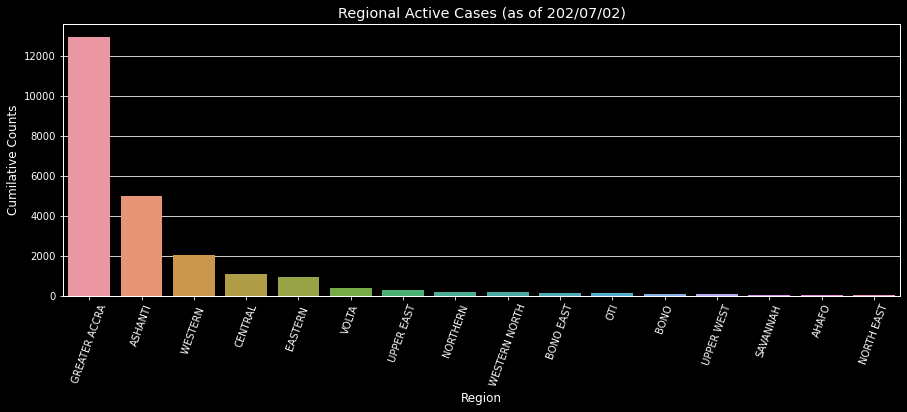

In [34]:
last_update="202/07/02"
plt.figure(figsize=(15,5))
sns.barplot(x=region['REGION'],y=region['CUMILATIVE COUNTS'])
plt.title('Regional Active Cases (as of {0})'.format(last_update))
plt.xlabel("Region")
plt.ylabel("Cumilative Counts")
plt.xticks(rotation=70)
plt.show

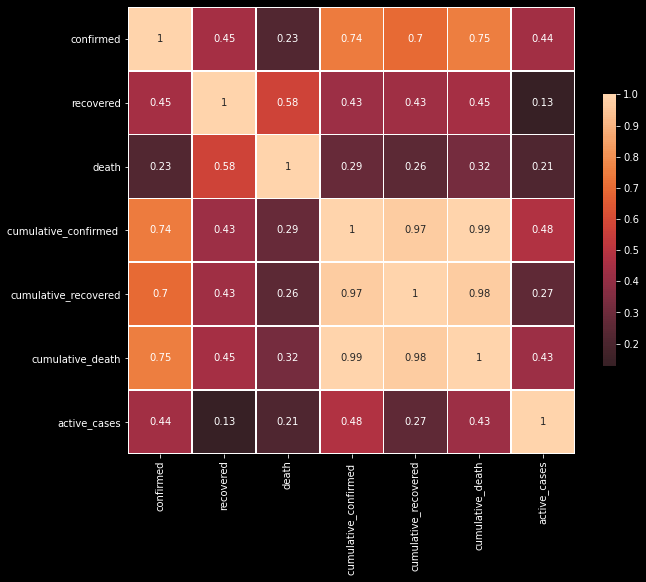

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(new_data.corr(),annot=True,square=True,linewidths=.5,cbar_kws={'shrink':.5},center=0)
plt.show()

The above graph shows there is a POSITIVE correlation between 
1. CUMILATIVE CONFIRMED CASES AND CUMILATIVE DEATH cases. 
2. CUMILATIVE CONFIRMED CASES AND CUMILATIVE RECOVERED CASES
3. CUMILATIVE RECOVERED CASES AND CUMILATIVE DEATH CASES.
The rise in one leads to the rise in the other,which means there is a LINEAR CORRELATION between the two.

In [36]:
afterRevision=new_data["13/3/2020":"17/6/2020"]
afterRevision.head()

,confirmed,recovered,death,cumulative_confirmed,cumulative_recovered,cumulative_death,active_cases
date,,,,,,,
2020-03-13,2,0,0,4,0,0,4
2020-03-14,2,0,0,6,0,0,6
2020-03-17,1,0,0,7,0,0,7
2020-03-18,2,0,0,9,0,0,9
2020-03-19,2,0,0,11,0,0,11


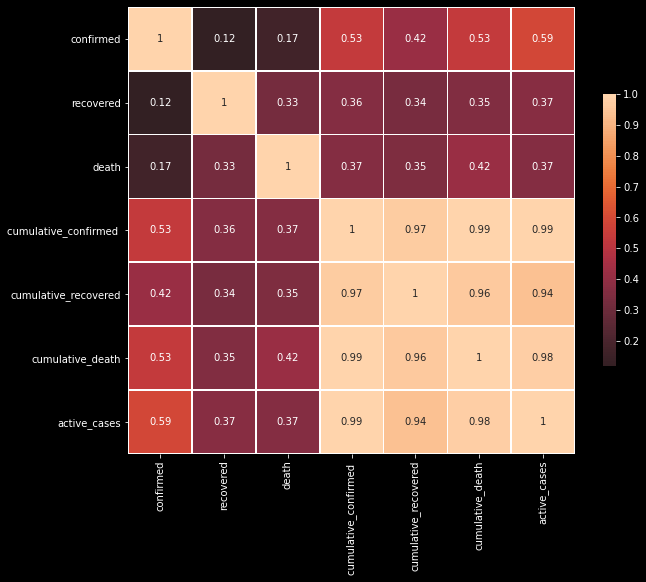

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(afterRevision.corr(),annot=True,square=True,linewidths=.5,cbar_kws={'shrink':.5},center=0)
plt.show()

Before World Health Organization's revision on recovery and discharge cases,there even more STRONGER CORRELATION BETWEN THE VARIOUS COLUMN FEATURES.

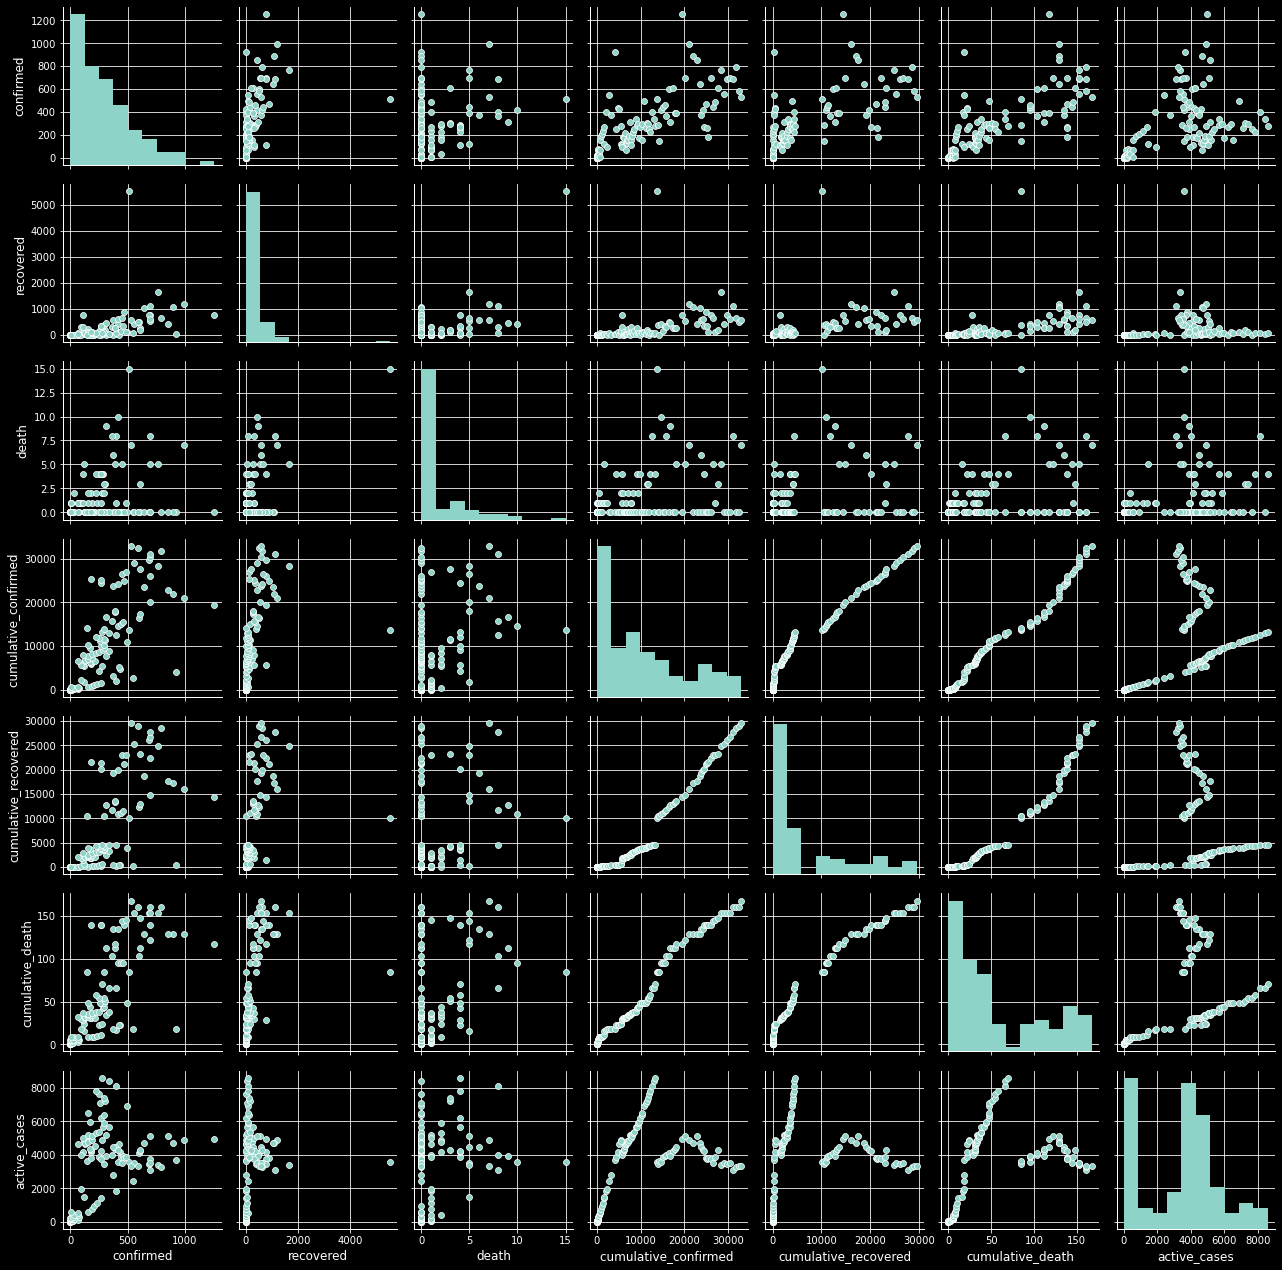

In [38]:
sns.pairplot(new_data)
plt.show()

THE ABOVE PLOT CLEARLY SHOWS HOW THE VARIOUS COLUMNS CORRELATE WITH EACH OTHER USING A SCATTER PLOT.

In [39]:
new_data.columns

Index(['confirmed', 'recovered', 'death', 'cumulative_confirmed ',
       'cumulative_recovered', 'cumulative_death', 'active_cases'],
      dtype='object')

<Figure size 1440x1080 with 0 Axes>

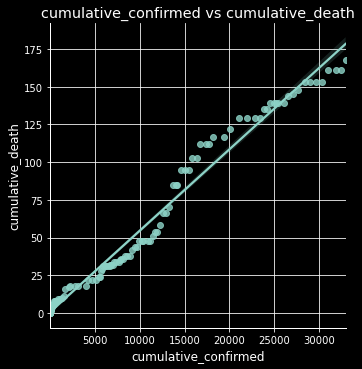

In [40]:

plt.figure(figsize=(20,15))
sns.lmplot(x='cumulative_confirmed ',y='cumulative_death',data=new_data)
plt.xlabel('cumulative_confirmed')
plt.ylabel('cumulative_death')
plt.title('cumulative_confirmed vs cumulative_death')
plt.show()

***LETS NOW CREATE LINEAR REGRESSION MODELS AND MAKE PREDICTIONS***

In [41]:
newfile="../input/new-ghana-covid19-cases/Ghana_Covid19_DailyActive.csv"
model_data=pd.read_csv(newfile)
model_data.head()

,confirmed,recovered,death,date,cumulative_confirmed,cumulative_recovered,cumulative_death,active_cases
0,2,0,0,3/12/2020,2,0,0,2
1,2,0,0,3/13/2020,4,0,0,4
2,2,0,0,3/14/2020,6,0,0,6
3,1,0,0,3/17/2020,7,0,0,7
4,2,0,0,3/18/2020,9,0,0,9


In [42]:
model_data.columns

Index(['confirmed', 'recovered', 'death', 'date', 'cumulative_confirmed ',
       'cumulative_recovered', 'cumulative_death', 'active_cases'],
      dtype='object')

In [43]:
new_df = model_data.drop(['death','confirmed','recovered','date'],axis='columns')
new_df.head()

,cumulative_confirmed,cumulative_recovered,cumulative_death,active_cases
0,2,0,0,2
1,4,0,0,4
2,6,0,0,6
3,7,0,0,7
4,9,0,0,9


**WE DROP THE ACTIVE CASES COLUMN BECAUSE IT WILL BE PREDICTED USING THE OTHER COLUMNS, IN THIS CASE WE MAKE IT THE DEPENDENT VARIABLE**

In [44]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   cumulative_confirmed   91 non-null     int64
 1   cumulative_recovered   91 non-null     int64
 2   cumulative_death       91 non-null     int64
 3   active_cases           91 non-null     int64
dtypes: int64(4)
memory usage: 3.0 KB


In [45]:
# new_df['date'] =  pd.to_datetime(new_df['date'])



In [46]:
# new_df['date_delta'] = (new_df['date'] - new_df['date'].min())  / np.timedelta64(1,'D')

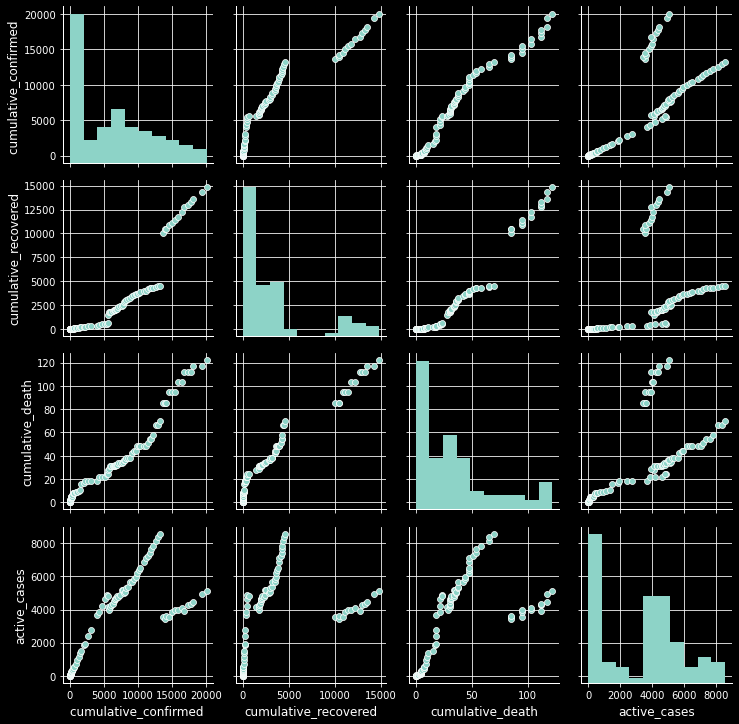

In [47]:
sns.pairplot(new_df)
plt.show()

**OUR NEW DATAFRAME ABOVE SHOWS A POSITIVE LINEAR RELATIONSHIP BETWEEN AND AMONGST THE VARIOUS COLUMNS**

**LETS DIVIDE OUR DATA INTO X AND Y VARIABLES AND MAKE PREDICTIONS**

In [48]:
X = new_df[['cumulative_confirmed ','cumulative_recovered','cumulative_death']]

In [49]:
y = new_df['active_cases']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

**I SPLIT MY DATA INTO 80% TRAIN 20% TEST**

In [51]:
X_train.head()

,cumulative_confirmed,cumulative_recovered,cumulative_death
18,204,3,5
9,25,2,2
65,9910,3645,48
60,8548,3132,38
45,5918,1754,31


**LETS RUN A LINEAR REGRESSION MODEL NOW****

In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [53]:
model.predict(X_test)

array([1.845e+03, 2.770e+03, 1.290e+02, 5.958e+03, 4.000e+00, 5.087e+03,
       1.135e+03, 4.150e+03, 6.200e+01, 1.870e+02, 5.540e+02, 3.976e+03,
       6.398e+03, 5.450e+02, 5.273e+03, 4.245e+03, 1.467e+03, 9.340e+02,
       4.292e+03])

In [54]:
y_test

33    1845
36    2770
13     129
64    5958
1        4
58    5087
30    1135
43    4150
11      62
17     187
25     554
83    3976
66    6398
26     545
59    5273
86    4245
32    1467
29     934
46    4292
Name: active_cases, dtype: int64

In [55]:
model.score(X_test, y_test)

1.0

**OUR MODEL HAS 100% ACCURACY. THIS IS BECAUSE OUR DATA IS SMALL IN SIZE. WE WILL TRY AND MAKE PREDICTIONS BASED ON EXTERNAL DATA.**

**TO BE CONTINUE.....**

Thank you for following.


CONTACT ME 
 PHONE: 0249943284
 GITHUB:github/Charis111
 Email:charisbaafi@gmail.com